In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline


In [4]:
# Load dataset (must be in same folder)
t = pd.read_csv("titanic2.csv")

# Show first few rows
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Get overall statistics
t.describe()

# Median and Standard Deviation
print("Median Values:\n", t.median(numeric_only=True))
print("\nStandard Deviations:\n", t.std(numeric_only=True))


Median Values:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

Standard Deviations:
 PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [10]:
# Fill missing values in Age with median
t['Age'].fillna(t['Age'].median(), inplace=True)

# Fill missing values in Embarked with most frequent value
t['Embarked'].fillna(t['Embarked'].mode()[0], inplace=True)

# Drop Cabin column if it exists
t.drop('Cabin', axis=1, inplace=True, errors='ignore')

# Drop any remaining nulls
t.dropna(inplace=True)

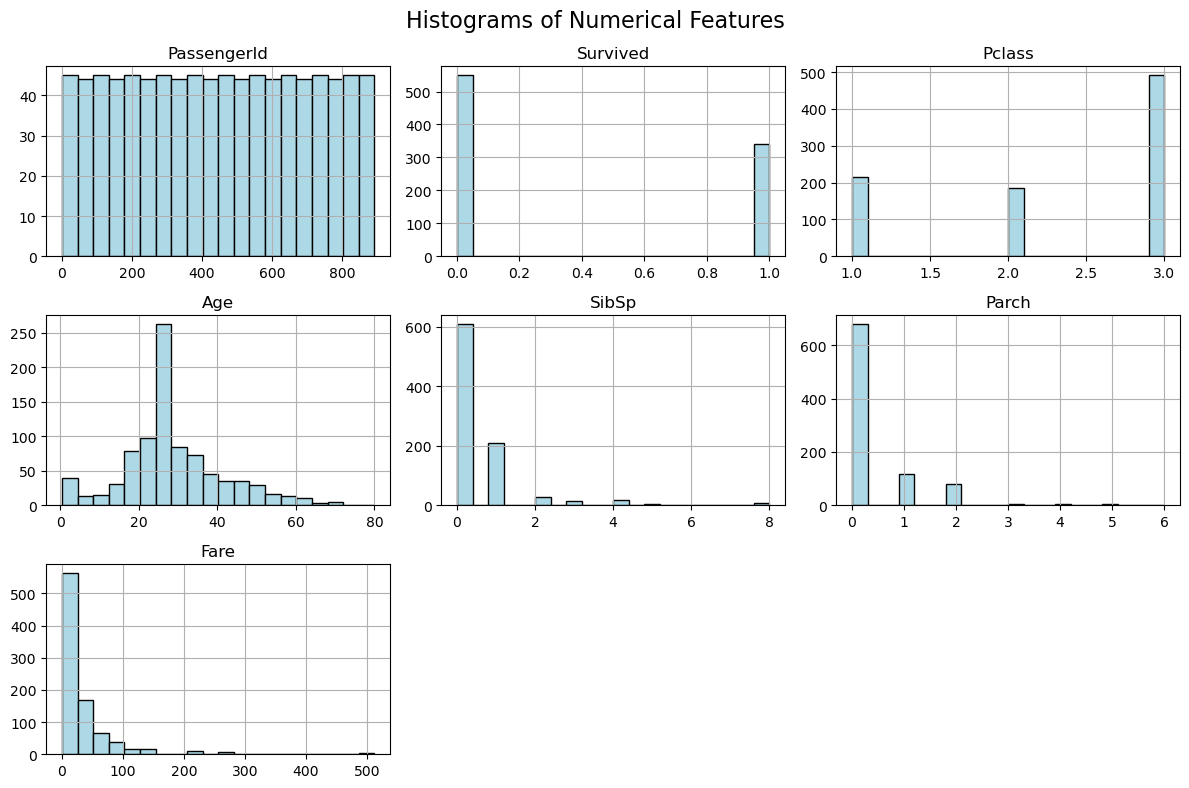

In [11]:
# Histogram for numerical columns
t.hist(figsize=(12, 8), bins=20, edgecolor='black', color='lightblue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

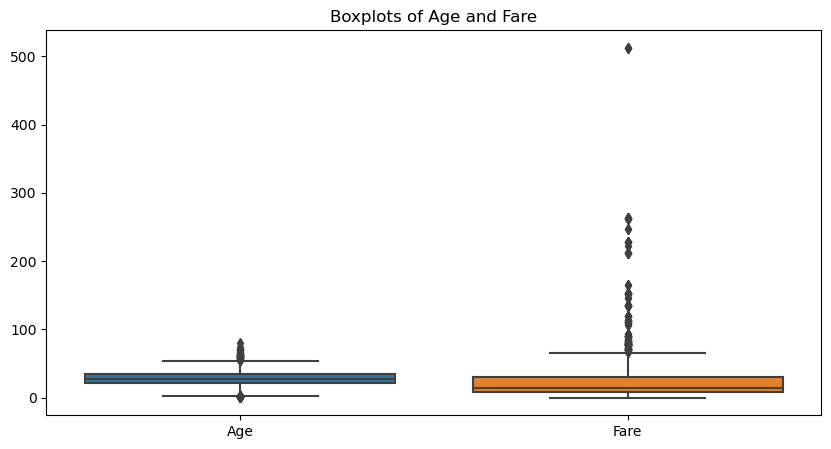

In [12]:
# Boxplots for key numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=t[['Age', 'Fare']])
plt.title("Boxplots of Age and Fare")
plt.show()

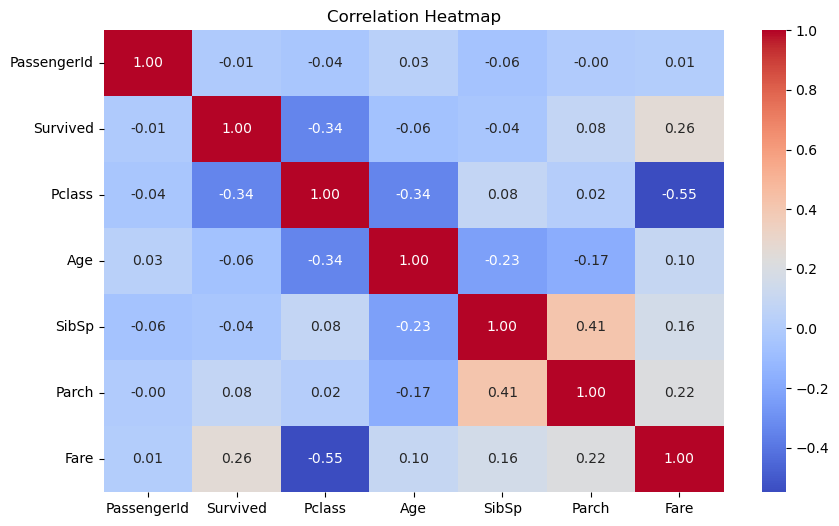

In [13]:
# Compute correlation matrix
corr_matrix = t.corr(numeric_only=True)

# Display heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Observations:
#- Female passengers had a higher survival rate than males.
#- 1st class passengers had better chances of survival.
#- 'Fare' and 'Pclass' showed some correlation with 'Survived'.
#- 'Age' and 'Fare' contain outliers (seen in boxplots).
